### Содержание:<br>
Шаг 1. Подготовка данных<br>
Шаг 2. Проведение анализа данных<br>
Шаг 3. Подготовить презентацию<br>
Шаг 4. Общие выводы

### Описание исследования:

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

### План исследования:

Шаг 1. Подготовка данных<br>
- импортировать необходимые библиотеки
- ознакомиться с документом /datasets/rest_data.csv
- проверить соблюдение единого стиля оформления 
- проверить корректность типа данных в каждой колонке
- проверить данные на дубликаты
- проверить данные на пропущенные значения
- сделать промежуточный вывод
<br>

Шаг 2. Проведение анализа данных<br>

1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
3. Для какого вида объекта общественного питания характерно сетевое распространение?
4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
6. Выделите в отдельный столбец информацию об улице из столбца address .
7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
9. Подготовить промежуточные выводы, разработать рекомендации относительно вида заведения, количества посадочных мест, районе расположения. Прокомментировать возможность развития сети
<br>

Шаг 3. Подготовить презентацию<br>

- Подготовить презентацию исследования для инвесторов в формате .pdf
<br>

Шаг 4. Общие выводы

### Описание данных:

# Шаг 1. Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2000)

In [2]:
try:
    rest = pd.read_csv('/datasets/rest_data.csv')
except:
    rest = pd.read_csv('rest_data.csv')

In [3]:
from io import BytesIO
import requests
spreadsheet_id = '1qTQUcCdJuccbHZRi18l9FoERWt8Il29wj4UH1sg06Fo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_data = pd.read_csv(BytesIO(r.content))
moscow_data

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [4]:
rest.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
rest['id'] = rest['id'].astype("string")

In [7]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  string
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(1), object(4), string(1)
memory usage: 720.4+ KB


In [8]:
rest.duplicated().sum()

0

In [9]:
rest['object_name'] = ((rest['object_name'].str.lower()))

In [10]:
# rest['object_name'] = rest['object_name'].str.replace('кафе ','')
# rest['object_name'] = rest['object_name'].str.replace('ресторан ','')
# rest['object_name'] = rest['object_name'].str.replace('пиццерия ','')
rest['object_name'] = rest['object_name'].str.replace('«','')
rest['object_name'] = rest['object_name'].str.replace('»','')
rest['object_name'] = rest['object_name'].str.replace(' burger king','')
# rest['object_name'] = rest['object_name'].str.replace('предприятие быстрого обслуживания ','')
rest['object_name'] = rest['object_name'].str.replace(' братья караваевы','')
rest['object_name'] = rest['object_name'].str.replace('магазин готовой еды ','')
rest['object_name'] = rest['object_name'].str.replace('ростикс ','')
rest['object_name'] = rest['object_name'].str.replace('иль-патио','иль патио')
# rest['object_name'] = rest['object_name'].str.replace('кальянная ','')
rest['object_name'] = rest['object_name'].str.replace('ресторан','')
rest['object_name'] = rest['object_name'].str.replace('семейное и кондитерская ','')
rest['object_name'] = rest['object_name'].str.replace('fridays ','')
rest['object_name'] = rest['object_name'].str.replace('шикари ','')
rest['object_name'] = rest['object_name'].str.replace(' кофе хаус','')
rest['object_name'] = rest['object_name'].str.replace(' кофемания','')
rest['object_name'] = rest['object_name'].str.replace(' волгоградский','')
# rest['object_name'] = rest['object_name'].str.replace('бар ','')
rest['object_name'] = rest['object_name'].str.replace(' il patio','')
rest['object_name'] = rest['object_name'].str.replace('кальян- бар ','')
rest['object_name'] = rest['object_name'].str.replace('кафе-закусочная ','')
rest['object_name'] = rest['object_name'].str.replace('кафе-пекарея ','')
rest['object_name'] = rest['object_name'].str.replace(' domino,s pizza','')

In [11]:
rest

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [12]:
rest['object_type'] = rest['object_type'].str.replace('предприятие быстрого обслуживания','ПБО')
rest['object_type'] = rest['object_type'].str.replace('магазин \(отдел кулинарии\)','отдел кулинарии')

/tmp/ipykernel_48/320512201.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  rest['object_type'] = rest['object_type'].str.replace('магазин \(отдел кулинарии\)','отдел кулинарии')


In [13]:
rest['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'ПБО', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'отдел кулинарии'], dtype=object)

### Промежуточные выводы

Во время подготовки данных мы ознакомились с документом “/datasets/rest_data.csv”. В нём содержится информация о заведениях общественного питания Москвы, а именно: уникальный идентификационный номер объекта, название объекта, относится ли объект к какой-либо сети, тип объекта, адрес, количество посадочных мест. Документ содержит 15366 строк, дубликаты отсутствуют, пропуски в данных отсутствуют. Для того, чтобы избавиться от неявных дубликатов нам пришлось привести все названия объектов к нижнему регистру, привести однородные названия к единому стилю. Также, были переименованы два типа объектов для дальнейшей работы и удобства построения графиков. 

**Данные готовы для дальнейшего анализа.** 

# Шаг 2. Проведение анализа данных

### 1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [14]:
kinds_of_objects = rest.groupby('object_type').agg(num=('number','count')).sort_values(by='num',ascending=False).reset_index(level=None)
kinds_of_objects['%'] = kinds_of_objects['num']/kinds_of_objects['num'].sum()*100
kinds_of_objects

,object_type,num,%
0,кафе,6099,39.69
1,столовая,2587,16.84
2,ресторан,2285,14.87
3,ПБО,1923,12.51
4,бар,856,5.57
5,буфет,585,3.81
6,кафетерий,398,2.59
7,закусочная,360,2.34
8,отдел кулинарии,273,1.78


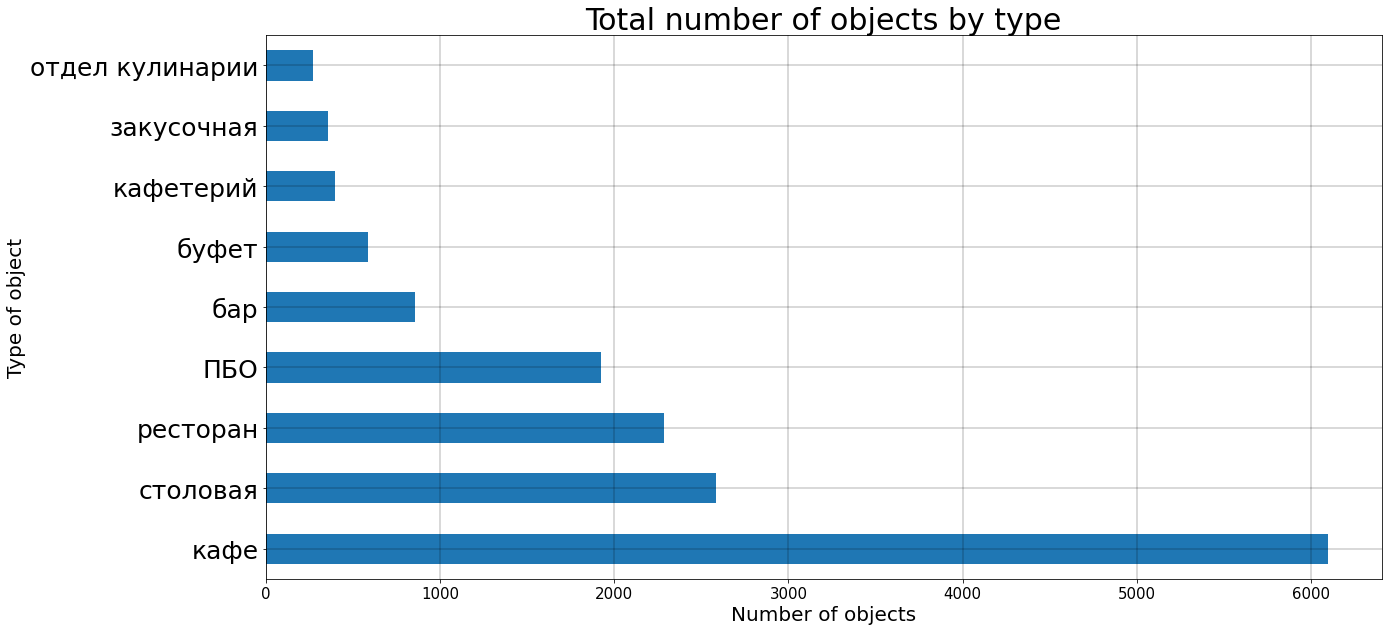

In [15]:
kinds_of_objects.plot(kind='barh', x='object_type', y='num',figsize=(20, 10),legend=False, fontsize=25)


plt.xlabel('Number of objects', fontsize=20)
plt.ylabel('Type of object', fontsize=20)
plt.title('Total number of objects by type', fontsize=30)
plt.grid(True, color='black', linestyle='-', linewidth=0.3)
plt.xticks(rotation=0, fontsize=15)

plt.show()

Наибольшей популярностью в Москве пользуются кафе, также люди заходят перекусить в столовые и отметить праздники в ресторане. Меньшую долю рынка общественного питания занимают предприятия быстрого обслуживания, бары и заведения, где можно быстро перекусить, либо взять еду с собой (буфет, кафетерия, закусочная, отдел кулинарии).

### 2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [16]:
chain_rest = rest.query('chain =="да"')
chain_rest_num = chain_rest['object_name'].nunique()
chain_rest_num

536

In [17]:
chain_and_not_chain = rest.groupby('chain')['id'].count()
chain_and_not_chain


chain
да      2968
нет    12398
Name: id, dtype: int64

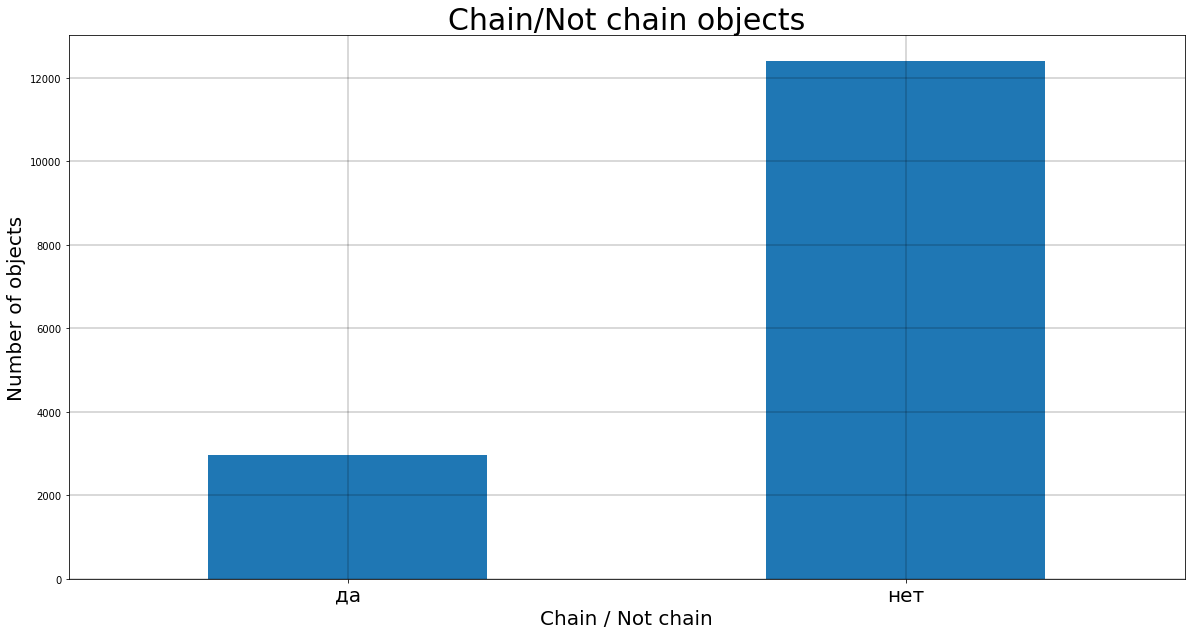

In [18]:
chain_and_not_chain.plot(kind='bar',x='chain', y='num',figsize=(20, 10),legend=False)

plt.xlabel('Chain / Not chain', fontsize=20)
plt.ylabel('Number of objects', fontsize=20)
plt.title('Chain/Not chain objects', fontsize=30)
plt.grid(True, color='black', linestyle='-', linewidth=0.3)
plt.xticks(rotation=0, fontsize=20)

plt.show()

В Москве большей популярностью пользуются несетевые заведения общественного питания, их почти в 4 раза больше, чем сетевых.

### 3. Для какого вида объекта общественного питания характерно сетевое распространение?

In [19]:
chain_by_type_of_object = (rest
                .groupby(['object_type','chain'])['id'].count()
                .reset_index()
                .rename(columns={'id':'counts'})
                .merge(rest.groupby('object_type').chain.count(), on='object_type',suffixes=('','_total'))
               )

chain_by_type_of_object['proportion'] = (chain_by_type_of_object.counts / chain_by_type_of_object.chain_total) * 100
chain_by_type_of_object.sort_values(by='proportion', ascending=False)

,object_type,chain,counts,chain_total,proportion
17,столовая,нет,2584,2587,99.88
5,буфет,нет,574,585,98.12
3,бар,нет,819,856,95.68
11,кафетерий,нет,346,398,86.93
7,закусочная,нет,304,360,84.44
9,кафе,нет,4703,6099,77.11
15,ресторан,нет,1741,2285,76.19
13,отдел кулинарии,нет,195,273,71.43
1,ПБО,нет,1132,1923,58.87
0,ПБО,да,791,1923,41.13



Наибольшая удельная доля сетевых заведений представлена в форматах: ПБО, отделов кулинарии, ресторанов и кафе. Для столовых, буфетов и бар сетевой распространение является редкостью.

### 4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [35]:
optimal_for_chains = chain_rest[chain_rest['number'] > 0].groupby('object_name').agg(id_count=('id','count'), mean_num=('number','median')).sort_values(by='id_count',ascending=False).reset_index(level=None)
optimal_for_chains['%'] = optimal_for_chains['id_count']/optimal_for_chains['id_count'].sum()*100
optimal_for_chains

,object_name,id_count,mean_num,%
0,шоколадница,159,50.00,5.89
1,kfc,156,50.00,5.78
2,макдоналдс,142,80.00,5.26
3,бургер кинг,134,46.50,4.96
4,домино'с пицца,91,16.00,3.37
5,теремок,82,25.00,3.04
6,крошка картошка,74,20.00,2.74
7,суши wok,60,7.00,2.22
8,папа джонс,48,20.00,1.78
9,додо пицца,48,32.50,1.78


In [36]:
percentile_amount_of_objects = np.percentile(optimal_for_chains['id_count'], [95])
percentile_amount_of_seats = np.percentile(optimal_for_chains['mean_num'], [90])

print('Количество объектов: (много объектов, субьективная оценка)',percentile_amount_of_objects)
print('Количество посадочных мест: (много посадочных мест, субьективная оценка)',percentile_amount_of_seats)

Количество объектов: (много объектов, субьективная оценка) [18.]
Количество посадочных мест: (много посадочных мест, субьективная оценка) [126.2]


In [37]:
def number (i):
    total = i['id_count']
    mean=i['mean_num']
    if total > percentile_amount_of_objects: 
        if mean > percentile_amount_of_seats:
            return 'много заведений/много мест'
    if total > percentile_amount_of_objects:
        if mean < percentile_amount_of_seats:
            return 'много заведений/мало мест'
    if total < percentile_amount_of_objects:
        if mean > percentile_amount_of_seats:
            return 'мало заведений/много мест'
    if total < percentile_amount_of_objects:
        if mean < percentile_amount_of_seats:
            return 'мало заведений/мало мест'


    
optimal_for_chains['additional_info'] = optimal_for_chains.apply(number, axis = 1)
optimal_for_chains

,object_name,id_count,mean_num,%,additional_info
0,шоколадница,159,50.00,5.89,много заведений/мало мест
1,kfc,156,50.00,5.78,много заведений/мало мест
2,макдоналдс,142,80.00,5.26,много заведений/мало мест
3,бургер кинг,134,46.50,4.96,много заведений/мало мест
4,домино'с пицца,91,16.00,3.37,много заведений/мало мест
5,теремок,82,25.00,3.04,много заведений/мало мест
6,крошка картошка,74,20.00,2.74,много заведений/мало мест
7,суши wok,60,7.00,2.22,много заведений/мало мест
8,папа джонс,48,20.00,1.78,много заведений/мало мест
9,додо пицца,48,32.50,1.78,много заведений/мало мест


In [38]:
optimal_for_chains.groupby('additional_info').agg({'additional_info':'count'})

,additional_info
additional_info,
мало заведений/мало мест,438
мало заведений/много мест,51
много заведений/мало мест,24
много заведений/много мест,1


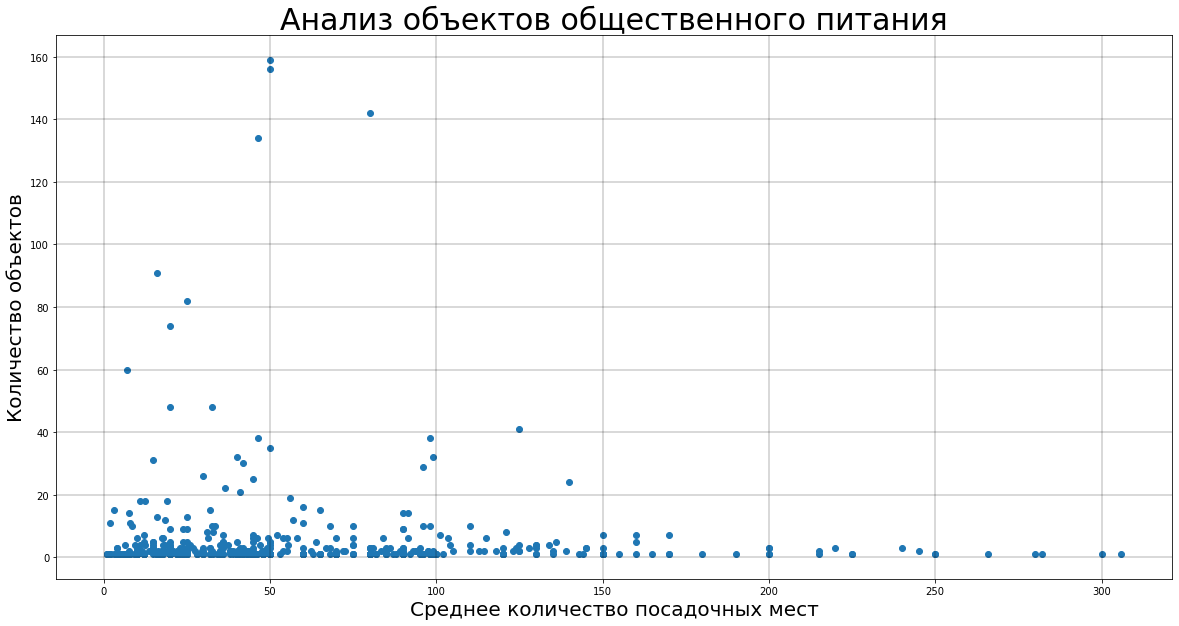

In [39]:
x = optimal_for_chains['mean_num']
y = optimal_for_chains['id_count']


figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title("Анализ объектов общественного питания", fontsize=30)
plt.xlabel("Среднее количество посадочных мест", fontsize=20)
plt.ylabel("Количество объектов", fontsize=20)
plt.scatter(x, y)
plt.show()



Для сетевых заведений характерно иметь мало заведений с небольшим количеством посадочных мест. В нашей выборке к этой категории относится наибольшее количество объектов (438). Также, 51 объект относится к категории “мало заведений/много мест”. 24 объекта относятся к категории “много заведений/мало мест”. И лишь один объект относится к категории “много заведений/много мест”. 

(*Ради интереса проверил с 70ым перцинтилями, выводы остаются такими же).

### 5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [ ]:
average_amount_of_seats = rest[rest['number'] > 0].groupby('object_type')['number'].mean().sort_values(ascending=False)
average_amount_of_seats

average_amount_of_seats.plot(kind='bar',figsize=(20, 10),legend=False)

plt.xlabel('Type of object', fontsize=20)
plt.ylabel('Number of seats', fontsize=20)
plt.title('Average number of seats', fontsize=30)
plt.grid(True, color='black', linestyle='-', linewidth=0.3)
plt.xticks(rotation=15, fontsize=20)

plt.show()

In [ ]:
median_amount_of_seats = rest[rest['number'] > 0].groupby('object_type')['number'].median().sort_values(ascending=False)
median_amount_of_seats

median_amount_of_seats.plot(kind='bar',figsize=(20, 10), color='navy', legend=False)

plt.xlabel('Type of object', fontsize=20)
plt.ylabel('Number of seats (median)', fontsize=20)
plt.title('Median number of seats', fontsize=30)
plt.grid(True, color='black', linestyle='-', linewidth=0.3)
plt.xticks(rotation=15, fontsize=20)

plt.show()

Из двух графиков мы можем заметить, что наибольшее количество посадочных мест (в среднем, и по медианному значению) имеют столовые. Это связано с тем, что там люди питаются люди на ежедневной основе (в рабочие, либо учебные дни), для того, чтобы восполнить энергию, и продолжить осуществлять свою деятельность. Также, в столовых можно организовать бюджетную свадьбу, либо поминки (опять же, нужно большое количество посадочных мест). За столовой по количеству посадочных мест следуют рестораны, буфеты и бары. По медиане, в кафе, ПБО, закусочных, кафетериях, и отделах кулинарии менее 40 посадочных мест. 

In [ ]:
objects_with_no_seats = rest[rest['number'] == 0].groupby('object_type')['number'].count().sort_values(ascending=False)
print(objects_with_no_seats)
print("Общее количество заведений без посадочных мест: ", objects_with_no_seats.sum())

Также, для полноты представлению, необходимо было проанализировать количество заведений без посадочных мест. Наиболее популярными заведениями, в которых люди покупают еду на вынос являются: ПБО, кафе, закусочные, отделы кулинарии и кафетерии. С большим отрывом лидирует ПБО, так как люди могут съесть Фаст-фуд в своей машине, либо на улице (в хорошую погоду), либо просто взять домой или в гости. 

In [ ]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest["streetname"] = rest["address"].str.extract(str_pat)
rest

In [ ]:
rest.merge(moscow_data, how='left', on='streetname')

### 7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [ ]:
top_10 = rest.groupby('streetname')['id'].count().sort_values(ascending=False).head(10)
top_10

In [ ]:
top_10_area = list(moscow_data[moscow_data['streetname'].isin(top_10.reset_index()['streetname'])]['area'].unique())
top_10_area

В таблице выше перечислены районы, в которых находятся ТОП-10 улиц с наибольшим количеством объектов общественного питания. (Для Москвы это нормально, так как улицы большие, и они входят в состав нескольких районов).

### 8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [ ]:
steets_with_one_object = sum(rest['streetname'].value_counts() == 1)
print('Общее количество улиц с одним объектом общественного питания: ', steets_with_one_object) 

In [ ]:
streetnames_by_object_cnt = rest.groupby(['streetname'], as_index=False).agg(object_count=('id', 'count'))
streetnames_by_object_cnt.sort_values(by='object_count', ascending=False, inplace=True)
streetnames_by_object_cnt=streetnames_by_object_cnt[streetnames_by_object_cnt['object_count'] == 1]

streetnames_by_object_cnt

In [ ]:
area_one_object = list(moscow_data[moscow_data['streetname'].isin(streetnames_by_object_cnt.reset_index()['streetname'])]['area'].unique())
area_one_object

В списке выше, представлены районы, в которых находятся улицы лишь с одним объектом общественного питания. 

### 9. Подготовить промежуточные выводы, разработать рекомендации относительно вида заведения, количества посадочных мест, районе расположения. Прокомментировать возможность развития сети

После проведённого анализа были предложены следующие рекомендации:
1. Ориентироваться на тип заведения “кафе”, так как это наиболее популярный формат объекта общественного питания. (В столовые люди приходят ежедневно, и роботы-официанты там вовсе не к чему. Когда люди приходят в рестораны, то им важен индивидуальный подход и внимание со стороны обслуживающего персонала). 
2. Да, можно запустить “пилотный” проект кафе с роботами, но всегда нужно держать в голове возможность роста в “сеть”. Это более стабильный формат ведения бизнеса и закрепления собственного бренда в публичном пространстве. Также, уровень доверия к “сетям” обычно выше, при условии, что менеджмент следит за выполнением определённых стандартов  и соблюдением всех норм и требований со стороны персонала. Опять же, для формат “кафе” является наиболее подходящим для сетевого распространения.
3. Нужно рассчитывать посадку на 40-50-60 мест. Конечное решение должно приниматься отталкиваясь от экспертного мнений, собственно представления о том, как будет работать объект и конкретной ситуации, вариантов, которые возникают на рынке (стоимость аренды, локация, площадь помещения итд).
4. Во время выбора локации, нужно ориентироваться на улицы, районы, в которых москвичи привыкли отдыхать. Кафе с роботами, определённо, идея со своей “изюминкой”, именно поэтому нужно ориентироваться на целевую аудитория, которая хочет попробовать что-то новенькое и устала от традиционных форматов общественного питания.

# Шаг 3. Подготовить презентацию

Презентация: https://drive.google.com/file/d/1OSg5JF_BmjVOCwmcHLhXYKLGDPHwwo6H/view?usp=sharing

# Шаг 4. Общие выводы

Во время подготовки данных мы ознакомились с документом “/datasets/rest_data.csv”. В нём содержится информация о заведениях общественного питания Москвы, а именно: уникальный идентификационный номер объекта, название объекта, относится ли объект к какой-либо сети, тип объекта, адрес, количество посадочных мест. Документ содержит 15366 строк, дубликаты отсутствуют, пропуски в данных отсутствуют. Для того, чтобы избавиться от неявных дубликатов нам пришлось привести все названия объектов к нижнему регистру, привести однородные названия к единому стилю. Также, были переименованы два типа объектов для дальнейшей работы и удобства построения графиков. Данные были подготовлены к дальнейшем работе.

Во время анализа данных мы выяснили, что:
- Наибольшей популярностью в Москве пользуются кафе, также люди заходят перекусить в столовые и отметить праздники в ресторане. Меньшую долю рынка общественного питания занимают предприятия быстрого обслуживания, бары и заведения, где можно быстро перекусить, либо взять еду с собой (буфет, кафетерия, закусочная, отдел кулинарии).
- В Москве большей популярностью пользуются несетевые заведения общественного питания, их почти в 4 раза больше, чем сетевых.
- Наибольшая удельная доля сетевых заведений представлена в форматах: ПБО, отделов кулинарии, ресторанов и кафе. Для столовых, буфетов и бар сетевой распространение является редкостью.
- Для сетевых заведений характерно иметь мало заведений с небольшим количеством посадочных мест. В нашей выборке к этой категории относится наибольшее количество объектов (438). Также, 51 объект относится к категории “мало заведений/много мест”. 24 объекта относятся к категории “много заведений/мало мест”. И лишь один объект относится к категории “много заведений/много мест”.
- Наибольшее количество посадочных мест имеют столовые. Это связано с тем, что там люди питаются люди на ежедневной основе (в рабочие, либо учебные дни), для того, чтобы восполнить энергию, и продолжить осуществлять свою деятельность. Также, в столовых можно организовать бюджетную свадьбу, либо поминки (опять же, нужно большое количество посадочных мест). За столовой по количеству посадочных мест следуют рестораны, буфеты и бары. По медиане, в кафе, ПБО, закусочных, кафетериях, и отделах кулинарии менее 40 посадочных мест.
- Наиболее популярными заведениями без посадочных мест, в которых люди покупают еду на вынос являются: ПБО, кафе, закусочные, отделы кулинарии и кафетерии. С большим отрывом лидирует ПБО, так как люди могут съесть Фаст-фуд в своей машине, либо на улице (в хорошую погоду), либо просто взять домой или в гости.

Также, мы проанализировали/подсчитали:
- Районы, в которых находятся ТОП-10 улиц с наибольшим количеством объектов общественного питания.
- Число улиц с одним объектом общественного питания, выяснили к каким районам относятся данные улицы

После проведённого анализа были предложены следующие рекомендации:
1. Ориентироваться на тип заведения “кафе”, так как это наиболее популярный формат объекта общественного питания. (В столовые люди приходят ежедневно, и роботы-официанты там вовсе не к чему. Когда люди приходят в рестораны, то им важен индивидуальный подход и внимание со стороны обслуживающего персонала). 
2. Да, можно запустить “пилотный” проект кафе с роботами, но всегда нужно держать в голове возможность роста в “сеть”. Это более стабильный формат ведения бизнеса и закрепления собственного бренда в публичном пространстве. Также, уровень доверия к “сетям” обычно выше, при условии, что менеджмент следит за выполнением определённых стандартов  и соблюдением всех норм и требований со стороны персонала. Опять же, для формат “кафе” является наиболее подходящим для сетевого распространения.
3. Нужно рассчитывать посадку на 40-50-60 мест. Конечное решение должно приниматься отталкиваясь от экспертного мнений, собственно представления о том, как будет работать объект и конкретной ситуации, вариантов, которые возникают на рынке (стоимость аренды, локация, площадь помещения итд).
4. Во время выбора локации, нужно ориентироваться на улицы, районы, в которых москвичи привыкли отдыхать. Кафе с роботами, определённо, идея со своей “изюминкой”, именно поэтому нужно ориентироваться на целевую аудитория, которая хочет попробовать что-то новенькое и устала от традиционных форматов общественного питания.